# Homework 3: Visualizing Data with Movies

Name: Shivansh Hedaoo

Date: 2/9

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [1]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import moviepy.video.io.ImageSequenceClip

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [2]:
# define the path to the data folder
data_folder = '/Users/prashanthedaoo/Desktop/CS185c/Data/Version4/Release4/interp_monthly/'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

/var/folders/tn/p8j3zh8d52g77kn81h1fhh3c0000gn/T/ipykernel_328/254046390.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lon = np.array(evel_data['longitude'])
/var/folders/tn/p8j3zh8d52g77kn81h1fhh3c0000gn/T/ipykernel_328/254046390.py:9: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lat = np.array(evel_data['latitude'])


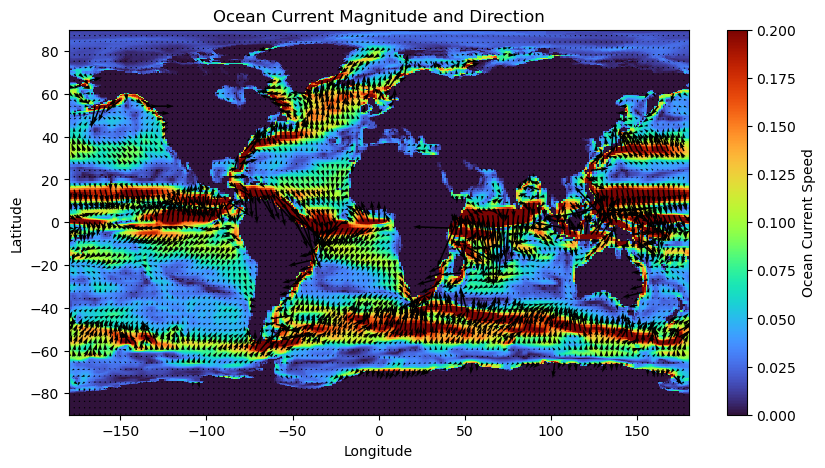

In [3]:
# read in the data
nvel_data = nc4.Dataset(data_folder +'NVEL/NVEL_1992_02.nc', 'r')
evel_data = nc4.Dataset(data_folder +'EVEL/EVEL_1992_02.nc', 'r')


nvel = np.array(nvel_data['NVEL'])
evel = np.array(evel_data['EVEL'])
lon = np.array(evel_data['longitude'])
lat = np.array(evel_data['latitude'])

full_vel = np.sqrt(nvel**2 + evel**2)

nvel_slice = nvel[0,0,:, :]
evel_slice = evel[0,0,:, :]
fvel_slice = full_vel[0,0,:, :]

fig = plt.figure(figsize=(10,5))
C = plt.pcolormesh(lon, lat, fvel_slice, vmin = 0, vmax=0.2, cmap ='turbo')
plt.colorbar(label = 'Ocean Current Speed')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ocean Current Magnitude and Direction")

step = 6
plt.quiver(lon[::step], lat[::step], nvel_slice[::step,::step], evel_slice[::step,::step])
plt.show()


Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [24]:
# define the longitude/latitude bounds
min_lon = -80
max_lon = 20
min_lat = 0
max_lat = 100




# compute the min/max row/col in the data grid
min_col = np.where(lon >= min_lon )[0][0]
max_col = np.where(lon <= max_lon)[0][-1] 
min_row = np.where(lat >= min_lat)[0][0]  
max_row = np.where(lat <= max_lat)[0][-1] 


Use the row and column bounds to subset the longitude, latitude, and your variable:

In [25]:
# subset the data
lon_sub = lon[min_col: max_col + 1]
lat_sub = lat[min_row: max_row + 1]


nvel_slice_sub = nvel_slice[min_row:max_row + 1, min_col:max_col + 1]
evel_slice_sub = evel_slice[min_row:max_row + 1, min_col:max_col + 1]

full_vel_sub = np.sqrt(nvel_slice_sub**2 + evel_slice_sub**2)


Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

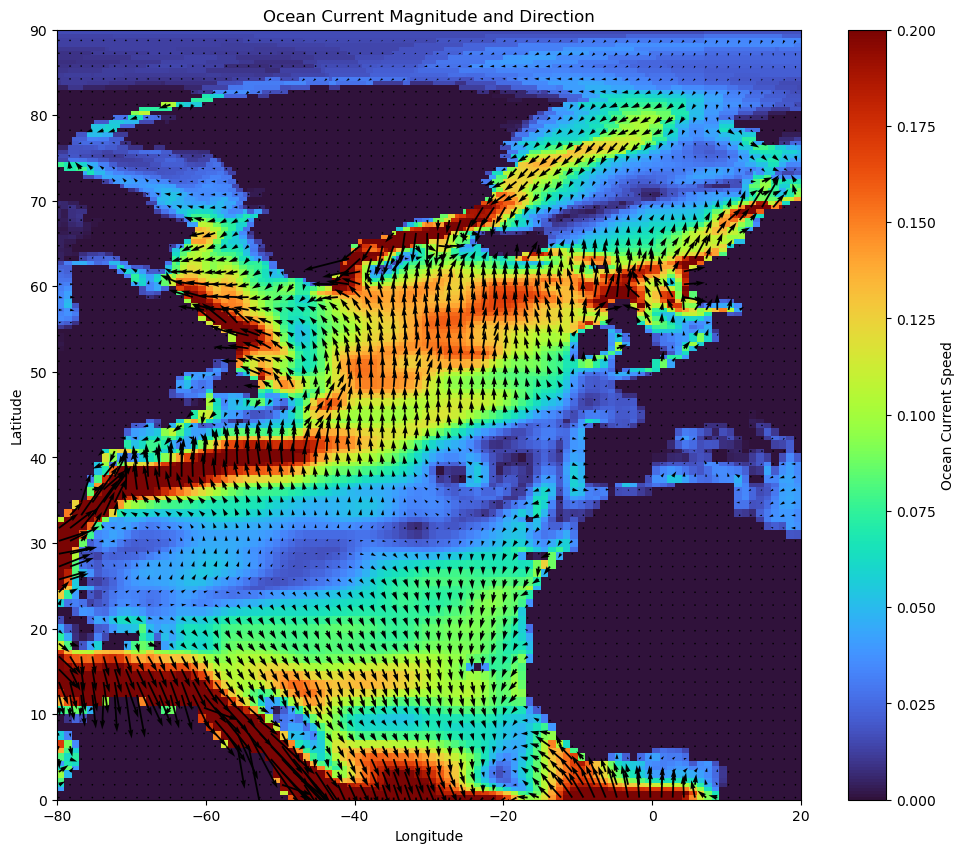

In [44]:
# make your figure here

fig = plt.figure(figsize=(12,10))

C = plt.pcolormesh(lon_sub, lat_sub, full_vel_sub, vmin = 0, vmax=0.2, cmap ='turbo')
plt.colorbar(label = 'Ocean Current Speed')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ocean Current Magnitude and Direction")

step = 3
plt.quiver(lon_sub[::step], lat_sub[::step], nvel_slice_sub[::step,::step], evel_slice_sub[::step,::step])
plt.show()

## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [4]:
# loop through the data and make a plot for each day
# make a list of files for each movie panel
# sort the panels

data_folder = '/Users/prashanthedaoo/Desktop/CS185c/Data/Version4/Release4/interp_monthly/'



# read in the data
nvel_data = nc4.Dataset(data_folder +'NVEL/NVEL_1992_02.nc', 'r')
evel_data = nc4.Dataset(data_folder +'EVEL/EVEL_1992_02.nc', 'r')
file_list = []
def plot_panel():
    # fill in your function here
    frames_directory = '/Users/prashanthedaoo/Desktop/CS185c/frames'
        
    os.makedirs(frames_directory, exist_ok=True) 
    
    for j in range(1992, 2015):
        for i in range(1,13):
            npath = os.path.join(data_folder, 'NVEL/NVEL_' + str(j)  + '_' + '{:02d}'.format(i) + '.nc')
            epath = os.path.join(data_folder, 'EVEL/EVEL_' + str(j)  + '_' +'{:02d}'.format(i) + '.nc')
    
            nvel_data = nc4.Dataset(npath,'r')
            evel_data = nc4.Dataset(epath,'r')
    
            nvel = np.array(nvel_data['NVEL'])
            evel = np.array(evel_data['EVEL'])
            lon = np.array(evel_data['i'])
            lat = np.array(evel_data['j'])
    
            nvel_slice = nvel[0,0,:, :]
            evel_slice = evel[0,0,:, :]
    
            full_vel = np.sqrt(nvel**2 + evel**2)
            fvel_slice = full_vel[0,0,:, :]
    
            file_path = os.path.join(frames_directory,'FVEL_' + str(j)  + '_' + '{:02d}'.format(i) + '.png')
            file_list.append(file_path)
            plot_frame(lon, lat, nvel_slice, evel_slice, fvel_slice, file_path)
            nvel_data.close() #close files after opening
            evel_data.close()

def plot_frame(lon, lat, nvel_slice, evel_slice,fvel_slice, filepath):

    fig = plt.figure(figsize=(10,5))
    C = plt.pcolormesh(lon, lat, fvel_slice, vmin = 0, vmax=0.2, cmap ='turbo')
    plt.colorbar(label = 'Ocean Current Speed')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Ocean Current Magnitude and Direction")
    step = 4
    plt.quiver(lon[::step], lat[::step], nvel_slice[::step,::step], evel_slice[::step,::step])
    plt.savefig(filepath)
    plt.close(fig)

        
plot_panel()

Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [5]:
# set the frames per second


# use the ImageSequenceClip module to set up the clip


# write the video to a file

fps = 5
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)
clip.write_videofile('currents.mp4')



Moviepy - Building video currents.mp4.
Moviepy - Writing video currents.mp4



Moviepy - Done !
Moviepy - video ready currents.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer: This movie displays the speed of ocean currents through frames of data taken each month from 1992 till 2015. The graph displays the speeds, as well as arrows which convey the direction of the current. From this, the movie shows examples of some important ocean phenomenons. For example, we can see along the east coast of the US, high speed currents going up the coast towards the artic, while along the the west, we see calm currents which flow down the coast from Canada.

We also see the difference in the direction of high velocity currents at the equator in the north/south hemispheres, due to the rotation of the Earth. 